In [22]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
from datetime import datetime
import time

# 행 많이보기
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# 한글 폰트 설정

fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
plt.rc('font', size=12)
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [23]:
# 데이터 로드
data = pd.read_excel('C:/Users/박소희/Desktop/Big_Con_Wanpanman/Data/2019_data_time.xlsx', encoding='cp949', header=0, parse_dates=["방송일시"])
# data = pd.read_excel('./data/2019_data_time.xlsx', encoding='cp949', header=0, parse_dates=["방송일시"])

# 데이터 정제

In [24]:
# 상품군 = 무형 제거 
data.drop(data[data['상품군']=='무형'].index, inplace=True)
data.reset_index(inplace=True)


data.columns = ['index', 'time', 'exposure_time', 'mcode', 'product_code', 'product_name', 'category','price','salesAMT']
print(data.columns)

Index(['index', 'time', 'exposure_time', 'mcode', 'product_code',
       'product_name', 'category', 'price', 'salesAMT'],
      dtype='object')


In [25]:
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S', errors='raise')

# 여기는 어떻게 할지 안정함
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['hour'] = data['time'].dt.hour
data['minute'] = data['time'].dt.minute
data['요일'] = data['time'].dt.weekday

In [26]:



# 06 ~ 익일 02 가 한 cycle임을 고려하여 0, 1, 2 에 +24를 해주자
overnight_index_list = data.loc[(data["hour"] >=0) & (data["hour"] < 3)].index

overnight_index_list
data.loc[overnight_index_list, "hour"] += 24
data.loc[overnight_index_list, "day"] -= 1
data.loc[overnight_index_list, "요일"] -= 1
data.loc[data["요일"] == -1, "요일"] = 6


# day = 0 인 곳, 그 전달의 마지막 날짜로 변경해주기
# 다음달로 넘어가거나 다음연도로 넘어간 항목은 월,일 재조정
data.loc[(data["month"] == 2) & (data["day"] == 0), ["month", "day"]] = 1, 31
data.loc[(data["month"] == 3) & (data["day"] == 0), ["month", "day"]] = 2, 28
data.loc[(data["month"] == 4) & (data["day"] == 0), ["month", "day"]] = 3, 31
data.loc[(data["month"] == 5) & (data["day"] == 0), ["month", "day"]] = 4, 30
data.loc[(data["month"] == 6) & (data["day"] == 0), ["month", "day"]] = 5, 31
data.loc[(data["month"] == 7) & (data["day"] == 0), ["month", "day"]] = 6, 30
data.loc[(data["month"] == 8) & (data["day"] == 0), ["month", "day"]] = 7, 31
data.loc[(data["month"] == 9) & (data["day"] == 0), ["month", "day"]] = 8, 31
data.loc[(data["month"] == 10) & (data["day"] == 0), ["month", "day"]] = 9, 30
data.loc[(data["month"] == 11) & (data["day"] == 0), ["month", "day"]] = 10, 31
data.loc[(data["month"] == 12) & (data["day"] == 0), ["month", "day"]] = 11, 30
data.loc[(data["month"] == 1) & (data["day"] == 0), ["month", "day"]] = 12, 31


# use data
df = data.loc[:,['month','day','hour','minute','요일','exposure_time', 'mcode', 'product_code', 'product_name', 'category','price','salesAMT']]

# column 생성_1 : items, repeat, salesAMT/total 

In [27]:
# 한개의 item 이 연속 한 번 편성된 경우
except_idxs = [34,6738,7455,8167,9751,10437,10549,11364,12919,13281,13799,14054,14608,16073,16812,17598,
               18225,18896,19608,20373,21299,21958,24159,24855,34845,35506,35807,36402]

In [28]:
# 새로운 col 생성
df['new_idx'] = df['month'].astype(str)+df['day'].astype(str)+df['product_code'].astype(str)
new = df.loc[:,['new_idx','salesAMT']]

idxs, times,items = [], [], []
tmp_times, tmp_items = [], []


time = 1
item = 0
i = 0

while i < 37364:
    
    # 한개 item이 한 번 연속 편성
    if i in except_idxs :
        item = 1
        i += 1
        time = 1
        
        times.append( time )
        items.append( item )        
        tmp_times.append(time)
        tmp_items.append(item)
        
        item, time, idxs = 0, 0, []

    # tmp로 idx 새로 등장한 idx 저장
    elif new['new_idx'][i] not in idxs :
        idxs.append(new['new_idx'][i])
        item += 1
        i += 1
        time = 1

    else : 
        time += 1
        ## time 세는 거
        if new['new_idx'][i+item] == new['new_idx'][i] :
            i += item
        else :
            i += item
            mul = time * item

            # column 생성용
            for x in range(mul) :
                times.append( time )
                items.append( item )

            # 다음 코딩용
            for x in range(item) :
                tmp_times.append(time)
                tmp_items.append(item)

            item, time, idxs = 0, 0, []


############ 마지막 부분 추가 안된 것이기 때문에
########### 테스트 데이터 생성시, 확인 필요 !!!
# column 생성용
for i in range(12) :
    times.append(4)
    items.append(3)

# 다음 코딩용
for i in range(3) :
    tmp_times.append(4)
    tmp_items.append(3)


new['items'] = items
new['repeat'] = times

In [29]:
def check_idx(li, idx_num) :
    li[idx_num] = 1
    return li

def my_turn(li) :
    return li.index(0)

not_yet = [0]*37372
total = [0]*37372


for one_item in except_idxs :
    not_yet = check_idx(not_yet, one_item)
    total[one_item] = new['salesAMT'][one_item]


for x, y in zip(tmp_times, tmp_items) :
    if x == 1 & y == 1 :
        pass
    else :
        tmp_sum = 0
        i = my_turn(not_yet)

        tmp_idx = []
        for k in range(x) : # 3번 연속 방송
            tmp_idx.append(i)
            tmp_sum += new['salesAMT'][i]
            not_yet = check_idx(not_yet, i)
            i += new['items'][i]

        for idx_num in tmp_idx :
            total[idx_num] = tmp_sum    
    
new['total'] = total
new['salesAMT/total'] = new['salesAMT']/new['total']
#new['취급액']=new['취급액']
new = new.loc[:,['items','repeat','salesAMT/total']]
tmp = pd.concat([df, new], axis=1)
df = tmp.loc[: ,['month','day','요일','hour','minute','exposure_time','repeat','category','mcode','product_code','items','product_name','price','salesAMT/total','salesAMT']]

# column 생성_2 : 마더코드 범주화 col 생성

In [30]:
MD = df['salesAMT'].groupby(df['mcode']).describe()
MD3 = pd.DataFrame()
MD3['sum'] = list(df['salesAMT'].groupby(df['mcode']).sum())
MD3['count'] = list(MD['count'])
MD3['mean'] = list(MD['mean'])
MD3.corr()

,sum,count,mean
sum,1.000000,0.812212,0.260278
count,0.812212,1.000000,-0.020222
mean,0.260278,-0.020222,1.000000


In [31]:
def make_MD(x) :
    if x > 35000000 :
        return 5
    elif x > 25000000 :
        return 4
    elif x > 15000000 :
        return 3    
    elif x > 10000000 :
        return 2
    else :
        return 1
    
MD['Mcode2'] = list(map(make_MD, MD['mean']))

In [32]:
MD['Mcode2'].value_counts()

3    164
1    133
5    132
4    131
2    127
Name: Mcode2, dtype: int64

In [33]:
def make_MD_col(x) :
    return MD['Mcode2'][x]

df['Mcode'] = list(map(make_MD_col, df['mcode']))

# column 생성_3 : holiday - 9

In [34]:
from datetime import datetime, timedelta

def days_back(x) :
    return x + timedelta(days=-9) ###### q변경

H2 = pd.read_csv('./data/holiday2.csv', encoding='cp949')
H2['holiday'] = pd.to_datetime(H2['holiday'], format='%Y%m%d', errors='raise')
H2['holiday'] = list(map(days_back, H2['holiday']))

H2['holiday_M'] = H2['holiday'].dt.month
H2['holiday_D'] = H2['holiday'].dt.day

# DAYS BACK하면서 2018년으로 넘어간 것들은 제거
H2 = H2[1::].reset_index(drop=True)

# 새로운 col 생성
H2['holiday_idx'] = H2['holiday_M'].astype(str)+H2['holiday_D'].astype(str)
df['new_idx'] = df['month'].astype(str)+df['day'].astype(str)

holiday_ = []
for idx in range(len(df)) :
    for hol_idx in range(len(H2)) : 
        if df['new_idx'][idx] == H2['holiday_idx'][hol_idx] :
            holiday_.append(1)
            break
    if len(holiday_) != idx + 1 :
        holiday_.append(0)


df['holiday'] = holiday_

In [35]:
df.to_csv('./data/train_ongoing.csv', encoding='cp949', index=False)

# Modeling test

## Feature 정리

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import lightgbm as lgb

def mape(A, F): 
    return np.mean(np.abs((A - F) / A)) * 100

new_data = df
new_data.columns

Index(['month', 'day', '요일', 'hour', 'minute', 'exposure_time', 'repeat',
       'category', 'mcode', 'product_code', 'items', 'product_name', 'price',
       'salesAMT/total', 'salesAMT', 'Mcode', 'new_idx', 'holiday'],
      dtype='object')

In [37]:
new_data.columns = ['M', 'D', 'day', 'H', 'm', 'exposure_time', 'repeat', 'category',
                    'Mothercode', 'productcode', 'items', 'name',  'price', 
                    'salesAMT/total', 'salesAMT','Mcode', 'new_idx','holiday']

# 상품군 get_dummies를 위한 category 내용 영어로 변경
def change_category_name(x) :
    if x == '의류' :
        return 'clothes'
    elif x == '속옷' :
        return 'underware'
    elif x == '주방' :
        return "kitchen"
    elif x == "농수축" :
        return "food"
    elif x == "이미용" :
        return "beauty"
    elif x == "가전" :
        return "electronics"
    elif x == "생활용품" :
        return "necessaries"
    elif x == "건강기능" :
        return "health"
    elif x == "잡화" : 
        return "goods"
    elif x == "가구":
        return "furniture"
    elif x == "침구":
        return "bedding"

new_data['category'] = list(map(change_category_name, new_data['category'])) 

# 상품군 get_dummies
new_data = pd.get_dummies(new_data,
                          columns=['category'],# category
                          prefix='category', drop_first=True)

In [38]:
# train data
X = new_data.drop(["salesAMT", 'name', 'new_idx', 'Mcode'], axis=1) # 'new_idx', "salesAMT",'name', 'new_idx'
y = new_data["salesAMT"] #salesAMT

## 랜덤포레스트

점수 :  68.57943905917098


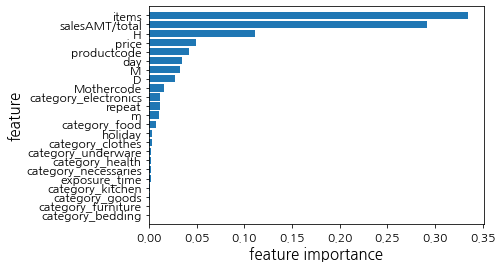

In [39]:
# train data 내에서 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=147, shuffle=True)

# model 설정
rf_model = RandomForestRegressor(n_estimators=300, n_jobs=-1,)

# 학습
rf_model.fit(X_train, y_train)

# 예측
pred = rf_model.predict(X_test)

# 점수 확인
print('점수 : ',mape(y_test, pred))

# feature 중요도 확인을 위해서 !
n_feature = X.shape[1]
index = np.arange(n_feature)

featureImportance = rf_model.feature_importances_
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])
plt.barh(index, featureImportance[sorted_idx] , align='center')
plt.yticks(barPos, X_train.keys()[sorted_idx])
#plt.yticks(index, X.columns)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()


# 아무것도 안했을 때 : 573.0829


# ( 1-1,           1-2,            1-3,    1-4   )
# (items,repeat , saleAMT/total , Mcode, holiday )

# 60.630084894625 ( 1-1, 1-2, 1-3, 1-4 ) 
# 554.9167967134957 ( 1-1, 1-2 X, 1-3, 1-4 )
# 565.4563062980724 ( 1-1, 1-2 X, 1-3 X, 1-4 )
# 67.90017724971746 ( 1-1, 1-2 , 1-3 X, 1-4 )

## LGBM

점수 :  155.56881833260957


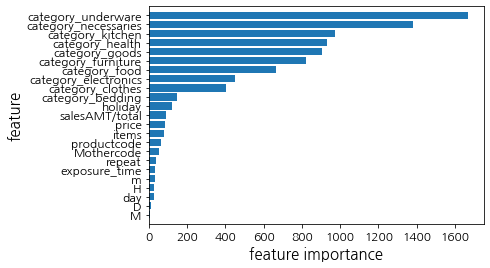

In [40]:
# train data 내에서 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=147, shuffle=True)

# model 설정
model = lgb.LGBMRegressor(random_state=147, n_estimators=300)

# 학습
model.fit(X_train, y_train)

# 예측
pred = model.predict(X_test)

# 점수 확인
print('점수 : ', mape(y_test,pred))

# feature 중요도 확인을 위해서 !
n_feature = X.shape[1]
index = np.arange(n_feature)

featureImportance = model.feature_importances_
#featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])

plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, X_train.keys()[sorted_idx])
plt.yticks(index, X.columns)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()

# ( 1-1,           1-2,            1-3,    1-4   )
# (items,repeat , saleAMT/total , Mcode, holiday )

# 151.38416138248525 ( 1-1, 1-2, 1-3, 1-4 )
# 551.3905666067202 ( 1-1, 1-2 X, 1-3, 1-4 )
# 541.0164344427321 ( 1-1, 1-2 X, 1-3 X, 1-4 )
# 155.56881833260957 ( 1-1, 1-2 , 1-3 X, 1-4 )